In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime 
%matplotlib inline
import seaborn as sns



In [5]:
df=pd.read_csv('HCCUR2018_HL_State.csv')
df.head()

,State,HCCI_category,Year,spending_per_member,OOP_spending_per_member,adjusted_price,adjusted_utilization_per_1000,case_mix_intensity_index,price,utilization_per_1000,...,annual_pct_change_case_mix_intensity_index,annual_pct_change_price,annual_pct_change_utilization_per_1000,cumulative_pct_change_spending_per_member,cumulative_pct_change_OOP_spending_per_member,cumulative_pct_change_adjusted_price,cumulative_pct_change_adjusted_utilization_per_1000,cumulative_pct_change_case_mix_intensity_index,cumulative_pct_change_price,cumulative_pct_change_utilization_per_1000
0,AK,Total,2014,"7,068.65",837.533,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,AK,Total,2015,"7,730.50",872.756,NaN,NaN,NaN,NaN,NaN,...,0.014,0.097,-0.002,0.094,0.042,0.082,0.012,0.014,0.097,-0.002
2,AK,Total,2016,"7,892.35",916.397,NaN,NaN,NaN,NaN,NaN,...,0.010,0.049,-0.026,0.117,0.094,0.124,-0.005,0.023,0.151,-0.027
3,AK,Total,2017,"7,527.34",930.359,NaN,NaN,NaN,NaN,NaN,...,0.007,-0.010,-0.036,0.065,0.111,0.106,-0.035,0.030,0.139,-0.063
4,AK,Total,2018,"7,974.34",952.706,NaN,NaN,NaN,NaN,NaN,...,0.012,0.037,0.021,0.128,0.138,0.134,-0.001,0.043,0.183,-0.042


In [6]:
df['HCCI_category'].unique()

array(['Total', 'IP', 'OP', 'PH', 'RX'], dtype=object)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   State                                                1275 non-null   object 
 1   HCCI_category                                        1275 non-null   object 
 2   Year                                                 1275 non-null   int64  
 3   Member Spending                                      1275 non-null   float64
 4   Out of Pocket Spending                               1275 non-null   object 
 5   adjusted_price                                       1020 non-null   object 
 6   adjusted_utilization_per_1000                        1020 non-null   object 
 7   case_mix_intensity_index                             1020 non-null   float64
 8   price                                                1020 non-null  

In [7]:
df.shape

(1275, 24)

In [8]:
df.isnull().sum()

State                                                    0
HCCI_category                                            0
Year                                                     0
spending_per_member                                      0
OOP_spending_per_member                                  0
adjusted_price                                         255
adjusted_utilization_per_1000                          255
case_mix_intensity_index                               255
price                                                  255
utilization_per_1000                                   255
annual_pct_change_spending_per_member                  255
annual_pct_change_OOP_spending_per_member              255
annual_pct_change_adjusted_price                       255
annual_pct_change_adjusted_utilization_per_1000        255
annual_pct_change_case_mix_intensity_index             255
annual_pct_change_price                                255
annual_pct_change_utilization_per_1000                 2

In [16]:
#Rename columns
df = df.rename(columns={'OOP_spending_per_member': 'Out of Pocket Spending'})
df = df.rename(columns={'spending_per_member': 'Member Spending'})
df = df.rename(columns={'spending_per_member': 'Member Spending'})

df.head()


,State,HCCI_category,Year,Member Spending,Out of Pocket Spending,adjusted_price,adjusted_utilization_per_1000,case_mix_intensity_index,price,utilization_per_1000,...,annual_pct_change_case_mix_intensity_index,annual_pct_change_price,annual_pct_change_utilization_per_1000,cumulative_pct_change_spending_per_member,cumulative_pct_change_OOP_spending_per_member,cumulative_pct_change_adjusted_price,cumulative_pct_change_adjusted_utilization_per_1000,cumulative_pct_change_case_mix_intensity_index,cumulative_pct_change_price,cumulative_pct_change_utilization_per_1000
0,AK,Total,2014,"7,068.65",837.533,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,AK,Total,2015,"7,730.50",872.756,NaN,NaN,NaN,NaN,NaN,...,0.014,0.097,-0.002,0.094,0.042,0.082,0.012,0.014,0.097,-0.002
2,AK,Total,2016,"7,892.35",916.397,NaN,NaN,NaN,NaN,NaN,...,0.010,0.049,-0.026,0.117,0.094,0.124,-0.005,0.023,0.151,-0.027
3,AK,Total,2017,"7,527.34",930.359,NaN,NaN,NaN,NaN,NaN,...,0.007,-0.010,-0.036,0.065,0.111,0.106,-0.035,0.030,0.139,-0.063
4,AK,Total,2018,"7,974.34",952.706,NaN,NaN,NaN,NaN,NaN,...,0.012,0.037,0.021,0.128,0.138,0.134,-0.001,0.043,0.183,-0.042


In [11]:
df.columns

Index(['State', 'HCCI_category', 'Year', 'spending_per_member',
       'OOP_spending_per_member', 'adjusted_price',
       'adjusted_utilization_per_1000', 'case_mix_intensity_index', 'price',
       'utilization_per_1000', 'annual_pct_change_spending_per_member',
       'annual_pct_change_OOP_spending_per_member',
       'annual_pct_change_adjusted_price',
       'annual_pct_change_adjusted_utilization_per_1000',
       'annual_pct_change_case_mix_intensity_index', 'annual_pct_change_price',
       'annual_pct_change_utilization_per_1000',
       'cumulative_pct_change_spending_per_member',
       'cumulative_pct_change_OOP_spending_per_member',
       'cumulative_pct_change_adjusted_price',
       'cumulative_pct_change_adjusted_utilization_per_1000',
       'cumulative_pct_change_case_mix_intensity_index',
       'cumulative_pct_change_price',
       'cumulative_pct_change_utilization_per_1000'],
      dtype='object')

In [20]:
df["Member Spending"]=df["Member Spending"].str.replace(",","")
df.head()

,State,HCCI_category,Year,Member Spending,Out of Pocket Spending,adjusted_price,adjusted_utilization_per_1000,case_mix_intensity_index,price,utilization_per_1000,...,annual_pct_change_case_mix_intensity_index,annual_pct_change_price,annual_pct_change_utilization_per_1000,cumulative_pct_change_spending_per_member,cumulative_pct_change_OOP_spending_per_member,cumulative_pct_change_adjusted_price,cumulative_pct_change_adjusted_utilization_per_1000,cumulative_pct_change_case_mix_intensity_index,cumulative_pct_change_price,cumulative_pct_change_utilization_per_1000
0,AK,Total,2014,7068.65,837.533,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,AK,Total,2015,7730.50,872.756,NaN,NaN,NaN,NaN,NaN,...,0.014,0.097,-0.002,0.094,0.042,0.082,0.012,0.014,0.097,-0.002
2,AK,Total,2016,7892.35,916.397,NaN,NaN,NaN,NaN,NaN,...,0.010,0.049,-0.026,0.117,0.094,0.124,-0.005,0.023,0.151,-0.027
3,AK,Total,2017,7527.34,930.359,NaN,NaN,NaN,NaN,NaN,...,0.007,-0.010,-0.036,0.065,0.111,0.106,-0.035,0.030,0.139,-0.063
4,AK,Total,2018,7974.34,952.706,NaN,NaN,NaN,NaN,NaN,...,0.012,0.037,0.021,0.128,0.138,0.134,-0.001,0.043,0.183,-0.042


In [23]:
#Spending by state

df["Member Spending"].unique()

array(['7068.65', '7730.50', '7892.35', ..., '917.758', '1002.88',
       '1000.04'], dtype=object)

In [25]:
df['Member Spending'] = df['Member Spending'].replace('[^\d.]', '', regex=True).astype(float)
df.groupby('State')['Member Spending'].sum().head()



State
AK    76386.373
AL    48879.098
AR    43983.015
AZ    47039.142
CA    53084.543
Name: Member Spending, dtype: float64

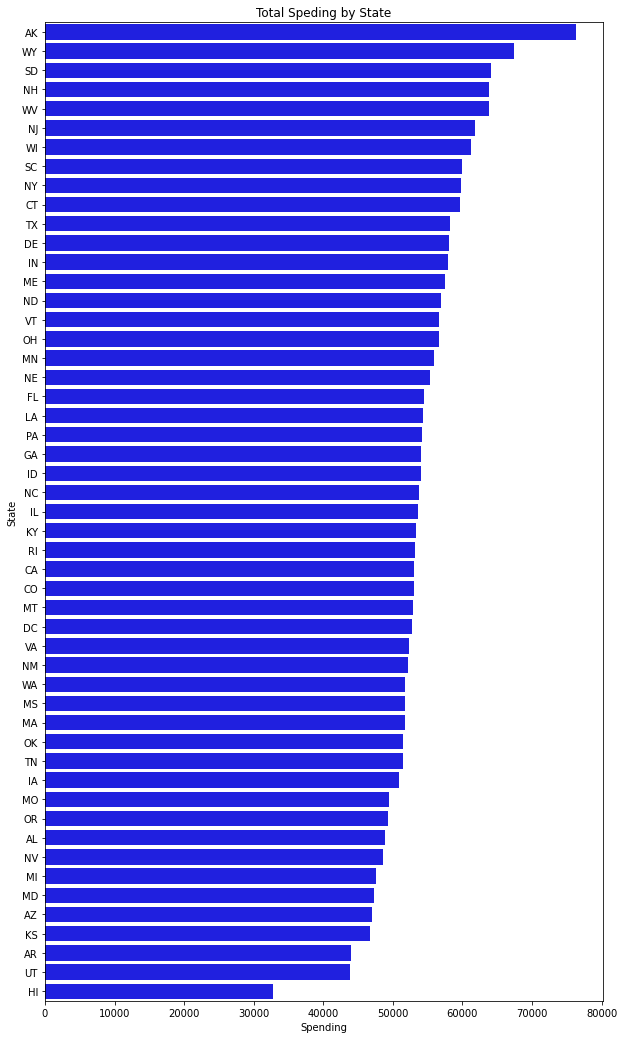

In [37]:
# calculate the total xG for each team
df_totals = df.groupby('State')['Member Spending'].sum().sort_values(ascending=False)


#fig, ax = plt.subplots(figsize=(10, 8))
# set the figure size
fig = plt.gcf()
fig.set_size_inches(10,18)


# create horizontal bar chart
sns.barplot(x=df_totals, y=df_totals.index, color='blue')


# set plot title and axis labels
plt.title('Total Speding by State')
plt.xlabel('Spending')
plt.ylabel('State')


plt.show()

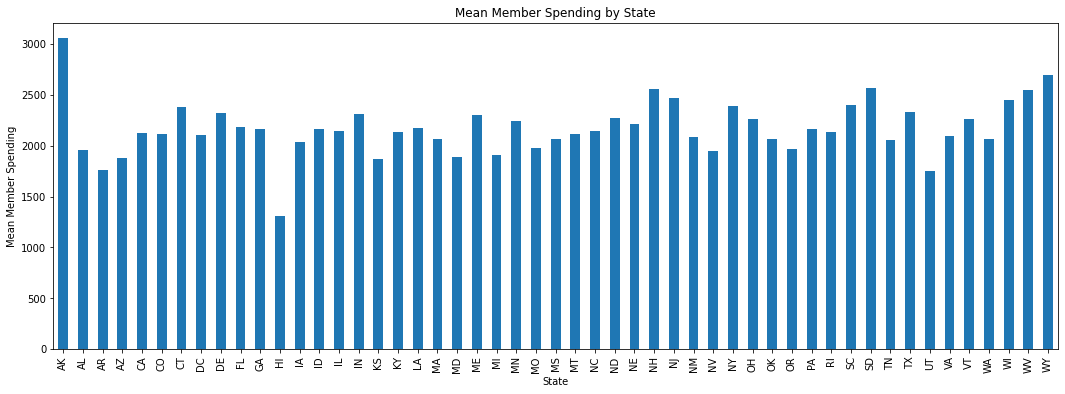

In [41]:
import matplotlib.pyplot as plt

# create the bar plot
ax = df.groupby('State')['Member Spending'].mean().plot(kind='bar')

# set the figure size
fig = plt.gcf()
fig.set_size_inches(18, 6)

# set the axis labels and title
ax.set_xlabel('State')
ax.set_ylabel('Mean Member Spending')
ax.set_title('Mean Member Spending by State')

# show the plot
plt.show()

